In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import requests
import io
from sklearn.decomposition import PCA


In [3]:
#import BRCA dataset from Kaggle
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub 
download = requests.get(url).content
brca_data =  pd.read_csv(io.StringIO(download.decode('utf-8')))

#import from my desktop (can # out and use ^)
#brca_data = pd.read_csv('/Users/chloeyachanin/Desktop/brca_data_w_subtypes.csv')

#clean up dataset for PCA
#identifying where string values present in dataset
string_columns = brca_data.select_dtypes(include=['object']).columns.tolist()
print(string_columns)
#print(dataset[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']])

brca_data = brca_data.fillna(0)
#changing values in string dataset to numeric values
value_map = {'Positive': 1, 'Negative': 2, 'infiltrating ductal carcinoma': 3, 'infiltrating lobular carcinoma': 4, 'Performed but Not Available':0, 'Not Performed':0, 'Equivocal': 5, 'Indeterminate':6, 'Not Available':0, None: 0}

check_columns = ['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']  # list of string column names

string_value = 'Negative'

for index, row in brca_data.iterrows():
    for string_column in check_columns:
        if row[string_column] in value_map:
            brca_data.at[index, string_column] = value_map[row[string_column]]
       
#print(brca_data[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']]) 

#save new dataset
#dataset.to_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv', index=False)

['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']


In [4]:
#import modified dataset
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/modified_brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

brca_data_modified =  pd.read_csv(io.StringIO(download.decode('utf-8')))

#import from my desktop (can # out and use ^)
#brca_data_modified = pd.read_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv')


In [17]:
#normalize data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(brca_data_modified)

#run PCA
pca = PCA(n_components = 0.95)
pca.fit(data_standardized)

loadings = pca.components_.T
scores = pca.transform(data_standardized)


print("Shape of loadings matrix:", loadings.shape)
print("Shape of scores matrix:", scores.shape)

Shape of loadings matrix: (1941, 377)
Shape of scores matrix: (705, 377)


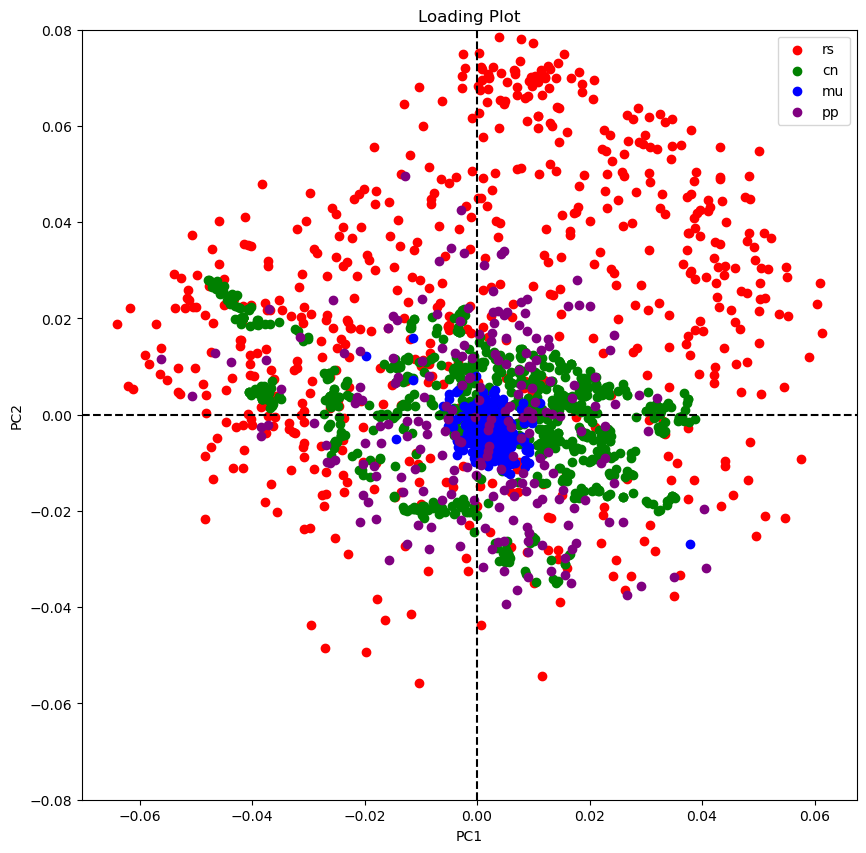

In [18]:
#plot loadings matrix

x_label = 'PC1'
y_label = 'PC2'
data_type_colors = {'rs': 'red', 'cn': 'green', 'mu': 'blue', 'pp': 'purple'}


fig, ax = plt.subplots()

data_types = [col[:2] for col in brca_data_modified.columns]

for data_type, color in data_type_colors.items():
    mask = [data_type == dt for dt in data_types]
    ax.scatter(loadings[mask, 0], loadings[mask, 1], c=color, label=data_type)

# Add variable labels to the scatter plot
#for i, variable in enumerate(brca_data_modified.columns):
    #ax.annotate(variable, (loadings[i, 0], loadings[i, 1]))


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Loading Plot')
ax.axvline(x=0, color='black', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_ylim([-0.08, 0.08])

fig.set_size_inches(10,10)
plt.legend()
plt.show()

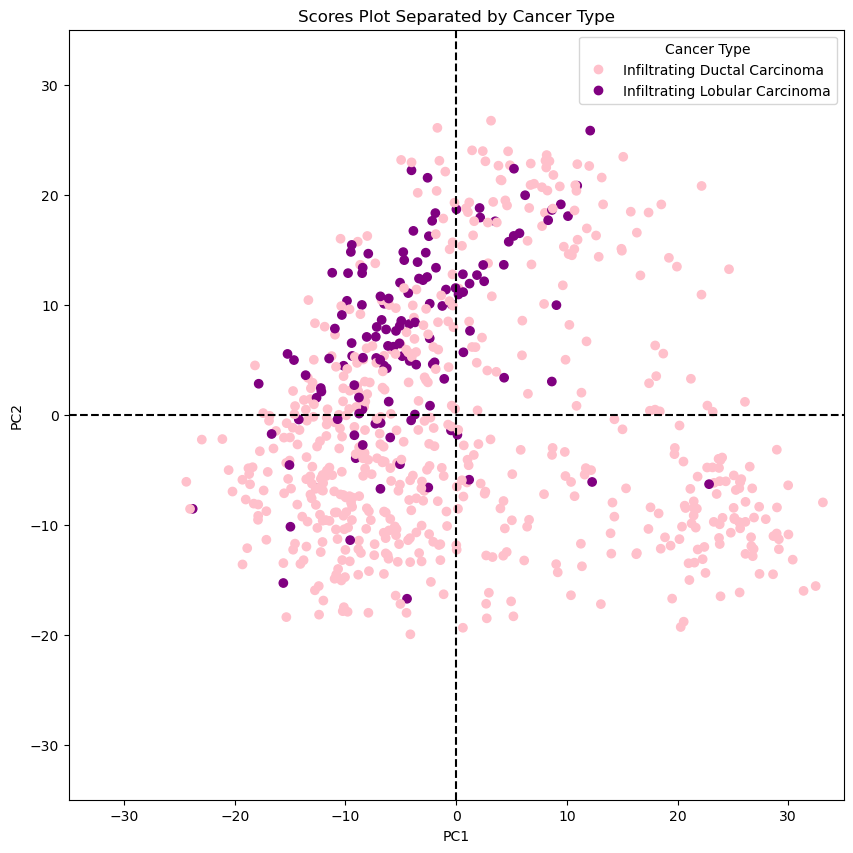

In [19]:
#plot scores matrix

import matplotlib.colors as mcolors
x_label = 'PC1'
y_label = 'PC2'

colors = mcolors.ListedColormap(['pink', 'green', 'blue', 'purple'])

change_label = {3: 'Infiltrating Ductal Carcinoma', 4: 'Infiltrating Lobular Carcinoma'}
fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1], c=brca_data_modified.iloc[:, 1940], cmap = colors)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by Cancer Type')
legend_labels = [change_label[label] for label in brca_data_modified.iloc[:, 1940].unique()]
legend = ax.legend(handles=scatter.legend_elements()[0], title='Cancer Type', labels = legend_labels)


ax.axvline(x=0, color='black', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlim([-35, 35])
ax.set_ylim([-35, 35])
fig.set_size_inches(10,10)
plt.show()


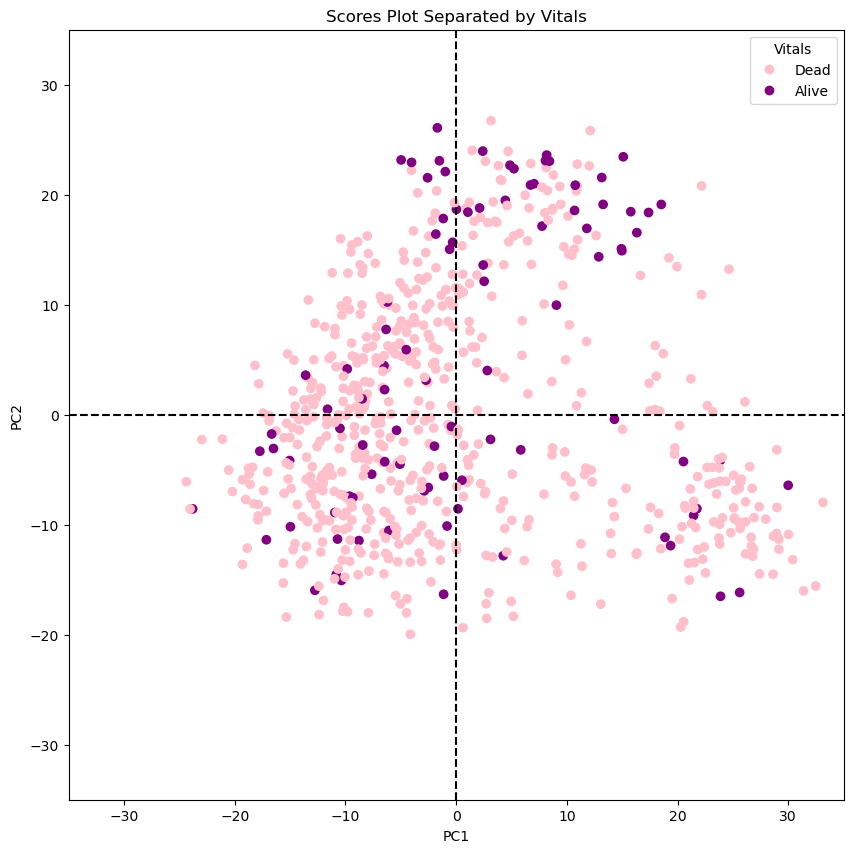

In [20]:
x_label = 'PC1'
y_label = 'PC2'


change_label = {1: 'Alive', 0: 'Dead'}
fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1], c=brca_data_modified.iloc[:, 1936], cmap = colors)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by Vitals')
legend_labels = [change_label[label] for label in brca_data_modified.iloc[:, 1936].unique()]
legend = ax.legend(handles=scatter.legend_elements()[0], title='Vitals', labels = legend_labels)

ax.axvline(x=0, color='black', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlim([-35, 35])
ax.set_ylim([-35, 35])
fig.set_size_inches(10,10)
plt.show()

[1 2 0 6]


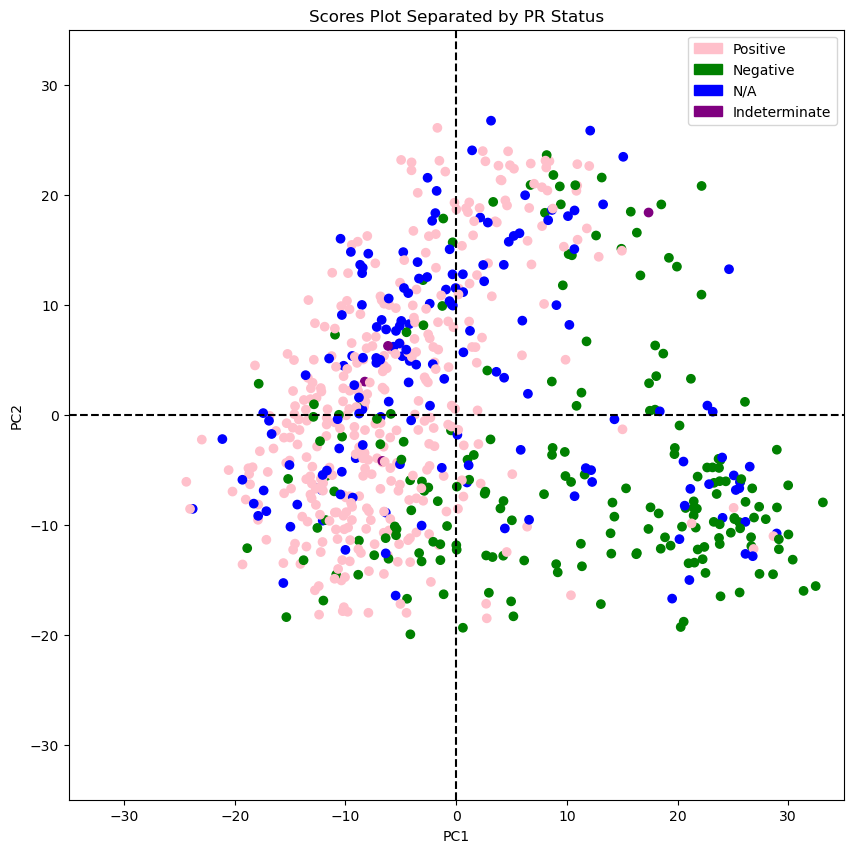

In [21]:
import matplotlib.patches as mpatches

x_label = 'PC1'
y_label = 'PC2'

change_color = {1: 'pink', 2: 'green', 0: 'blue', 6: 'purple'}
change_label = {1: 'Positive', 2: 'Negative', 0: 'N/A', 6: 'Indeterminate'}
color_list = [change_color[val] for val in brca_data_modified.iloc[:, 1937]]

print(brca_data_modified.iloc[:, 1937].unique())

fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1],  c=color_list)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by PR Status')


handles = []
for key in change_label:
    label = change_label[key]
    color = change_color[key]
    handles.append(mpatches.Patch(color=color, label=label))

    
ax.legend(handles=handles)
ax.axvline(x=0, color='black', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlim([-35, 35])
ax.set_ylim([-35, 35])
fig.set_size_inches(10,10)
plt.show()

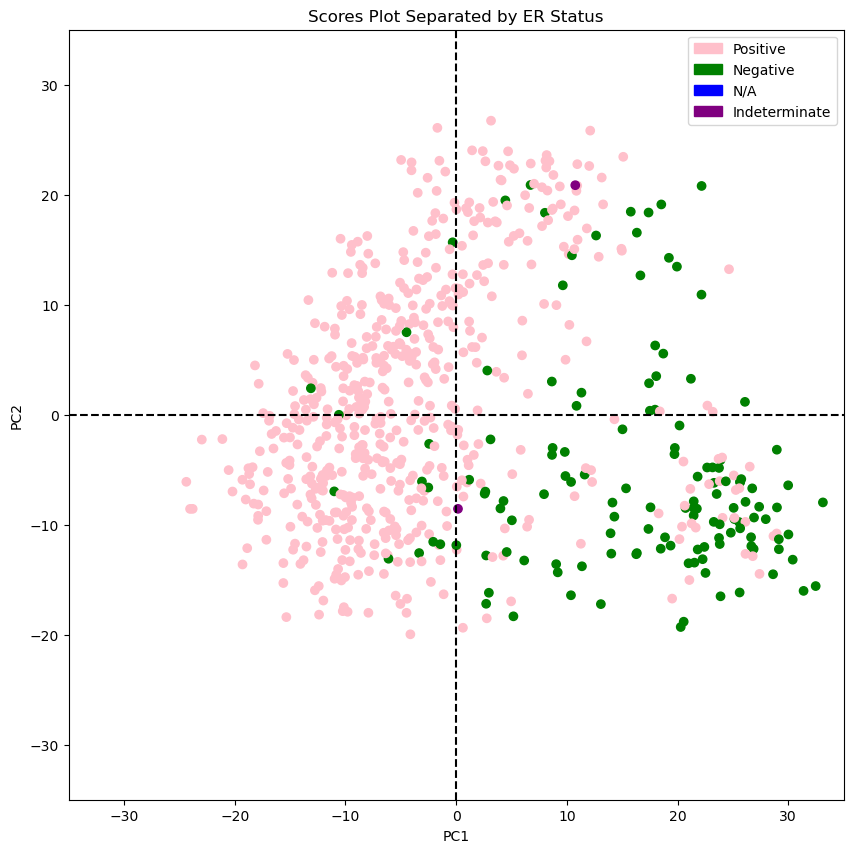

In [22]:
x_label = 'PC1'
y_label = 'PC2'
change_color = {1: 'pink', 2: 'green', 0: 'blue', 6: 'purple'}
change_label = {1: 'Positive', 2: 'Negative', 0: 'N/A', 6: 'Indeterminate'}
color_list = [change_color[val] for val in brca_data_modified.iloc[:, 1938]]
fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1], c=brca_data_modified.iloc[:, 1938], cmap = colors)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by ER Status')


handles = []
for key in change_label:
    label = change_label[key]
    color = change_color[key]
    handles.append(mpatches.Patch(color=color, label=label))
    
ax.legend(handles=handles)
ax.axvline(x=0, color='black', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlim([-35, 35])
ax.set_ylim([-35, 35])
fig.set_size_inches(10,10)
plt.show()

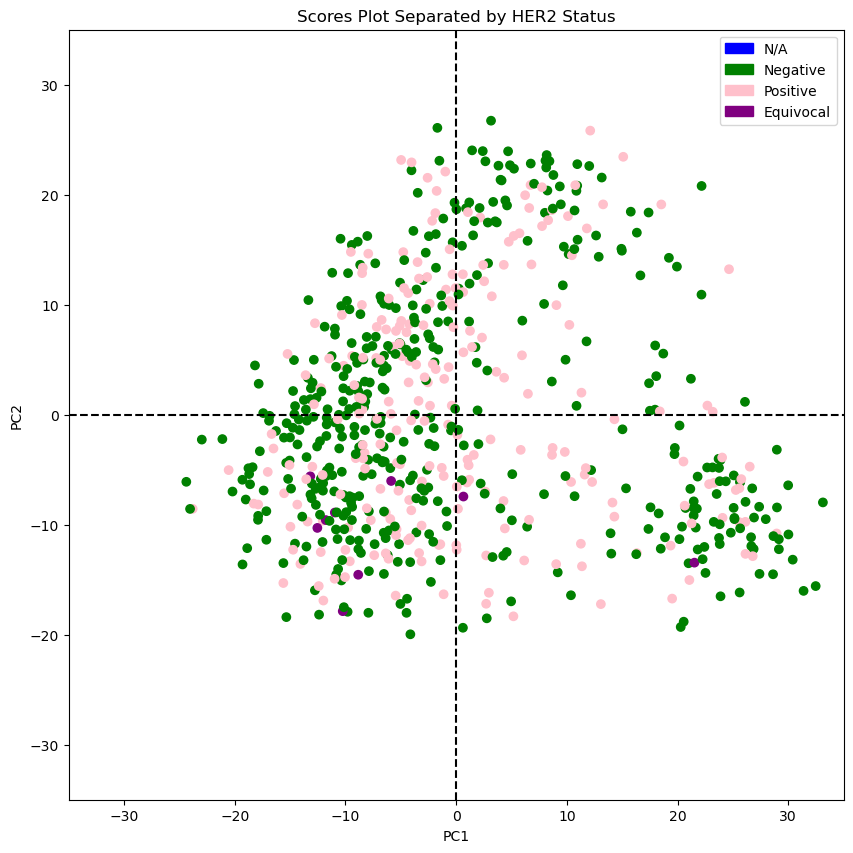

In [23]:
x_label = 'PC1'
y_label = 'PC2'
change_color = {1: 'pink', 2: 'green', 0: 'blue', 5: 'purple'}
change_label = {0: 'N/A', 2: 'Negative', 1: 'Positive', 5: 'Equivocal'}
color_list = [change_color[val] for val in brca_data_modified.iloc[:, 1939]]
fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1], c=brca_data_modified.iloc[:, 1939], cmap = colors)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by HER2 Status')
legend_labels = [change_label[label] for label in brca_data_modified.iloc[:, 1939].unique()]
legend = ax.legend(handles=scatter.legend_elements()[0], title='HER2 Status', labels = legend_labels)

handles = []
for key in change_label:
    label = change_label[key]
    color = change_color[key]
    handles.append(mpatches.Patch(color=color, label=label))
    
ax.legend(handles=handles)
ax.axvline(x=0, color='black', linestyle='--')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlim([-35, 35])
ax.set_ylim([-35, 35])
fig.set_size_inches(10,10)
plt.show()

In [24]:
#Calculate R2X

SumSqr = np.sum(np.square(data_standardized))
Variance = np.sum(np.square(loadings), axis=0)
Proportion = Variance/SumSqr
Proportion2 = np.cumsum(Proportion)

Proportion3 = 0.95
k = np.argmax(Proportion2 >= Proportion3) + 1
R2X = np.sum(np.square(scores[:, :k])) / SumSqr

print(R2X)

0.08174313715408878


In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

scores = pca.transform(data_standardized)
Y = np.array(brca_data_modified.iloc[:, 1940])

#k-fold cross-validation cancer subtype
kf = KFold(n_splits=5, shuffle=True, random_state=1)
pipe = Pipeline([('pca', PCA(n_components=0.95)),
                 ('regressor', LinearRegression())])

r2_scores = []
for train_idx, test_idx in kf.split(scores):
    X_train, X_test = scores[train_idx], scores[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    #R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


print("Mean R-squared score Cancer Subtype:", np.mean(r2_scores))

Mean R-squared score: 0.6164630144848191


In [31]:
Y = np.array(brca_data_modified.iloc[:, 1939])

#k-fold cross-validation cancer subtype
kf = KFold(n_splits=5, shuffle=True, random_state=1)
pipe = Pipeline([('pca', PCA(n_components=0.95)),
                 ('regressor', LinearRegression())])

r2_scores = []
for train_idx, test_idx in kf.split(scores):
    X_train, X_test = scores[train_idx], scores[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    #R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


print("Mean R-squared score HER2 Status:", np.mean(r2_scores))

Mean R-squared score HER2 Status: 0.5346223379181521


In [32]:
Y = np.array(brca_data_modified.iloc[:, 1938])

#k-fold cross-validation cancer subtype
kf = KFold(n_splits=5, shuffle=True, random_state=1)
pipe = Pipeline([('pca', PCA(n_components=0.95)),
                 ('regressor', LinearRegression())])

r2_scores = []
for train_idx, test_idx in kf.split(scores):
    X_train, X_test = scores[train_idx], scores[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    #R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


print("Mean R-squared score ER Status:", np.mean(r2_scores))

Mean R-squared score ER2 Status: 0.5442707791473562


In [33]:
Y = np.array(brca_data_modified.iloc[:, 1937])

#k-fold cross-validation cancer subtype
kf = KFold(n_splits=5, shuffle=True, random_state=1)
pipe = Pipeline([('pca', PCA(n_components=0.95)),
                 ('regressor', LinearRegression())])

r2_scores = []
for train_idx, test_idx in kf.split(scores):
    X_train, X_test = scores[train_idx], scores[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    #R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


print("Mean R-squared score PR Status:", np.mean(r2_scores))

Mean R-squared score PR Status: 0.4795224213433255


In [35]:
Y = np.array(brca_data_modified.iloc[:, 1936])

#k-fold cross-validation cancer subtype
kf = KFold(n_splits=5, shuffle=True, random_state=1)
pipe = Pipeline([('pca', PCA(n_components=0.95)),
                 ('regressor', LinearRegression())])

r2_scores = []
for train_idx, test_idx in kf.split(scores):
    X_train, X_test = scores[train_idx], scores[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    #R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


print("Mean R-squared score Vitality:", np.mean(r2_scores))

Mean R-squared score Vitality: 0.20802122974982556
